# T1

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

In [0]:
# Initialization
mean = np.array([[3,3], [2,2], [-3,-3]], dtype='float64')
# variance = np.array([[1,1], [1,1], [1,1]])
data = np.array([[1,2],
                [3,3],
                [2,2],
                [8,8],
                [6,6],
                [7,7],
                [-3,-3],
                [-2,-4],
                [7,-7]], dtype='float64')
weight = np.array([1/3, 1/3, 1/3], dtype='float64')
cov = np.array([np.identity(2), np.identity(2), np.identity(2)], dtype='float64')

# weights = weights.reshape(weights.shape[0], 1)

In [0]:
num_gaussian = 3
num_data = len(data)
num_iteration = 3

loglikelihood = list()

# run GMM for 3 steps
for step in range(num_iteration):

 
 # Expectation step
  multi_weight = np.zeros((num_data, num_gaussian), dtype='float64')
  prob_multi = np.zeros((num_data, num_gaussian), dtype='float64')
  each_likelihood = 1
  for n in range(num_data):
    for j in range(num_gaussian):
      multi_weight[n, j] = multivariate_normal.pdf(data[n], mean=mean[j], cov=cov[j]) * weight[j]
      prob_multi[n, j] = multivariate_normal.pdf(data[n], mean=mean[j], cov=cov[j]) * weight[j] / np.sum(multi_weight[n, :j+1], axis=0)

 
  loglikelihood.append(np.sum(multi_weight[n, :], axis=0))

  # Maximization step
  for j in range(num_gaussian):
    temp = 0
    weight[j] = 0
    cov[j] = np.zeros(2)
    for n in range(num_data):
      weight[j] += prob_multi[n, j]
      temp += prob_multi[n, j]
      cov[j] += prob_multi[n, j] * (data[n] - mean[j]).dot((data[n] - mean[j]).T)
    cov[j] /= temp
    weight[j] /= num_data
    mean[j] = np.zeros(2)
    for n in range(num_data):
      mean[j] += prob_multi[n, j] * data[n]
    mean[j] /= temp
    for row in range(cov[j].shape[0]):
      for col in range(cov[j].shape[1]):
        if (row != col):
          cov[j][row, col] = 0
   


# T2

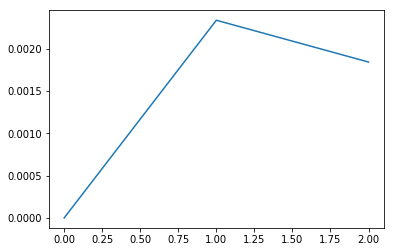

In [0]:
three_mixture_likelihood = loglikelihood
plt.plot(np.arange(num_iteration), loglikelihood)
plt.show()

# T3

In [0]:
# Initialization
mean = np.array([[3,3], [-3,-3]], dtype='float64')
data = np.array([[1,2],
                [3,3],
                [2,2],
                [8,8],
                [6,6],
                [7,7],
                [-3,-3],
                [-2,-4],
                [7,-7]], dtype='float64')
weight = np.array([1/2, 1/2], dtype='float64')
cov = np.array([np.identity(2), np.identity(2)], dtype='float64')

num_gaussian = 2
num_data = len(data)
num_iteration = 3

loglikelihood = list()

# run GMM for 3 steps
for step in range(num_iteration):

 
 # Expectation step
  multi_weight = np.zeros((num_data, num_gaussian), dtype='float64')
  prob_multi = np.zeros((num_data, num_gaussian), dtype='float64')
  each_likelihood = 1
  for n in range(num_data):
    for j in range(num_gaussian):
      multi_weight[n, j] = multivariate_normal.pdf(data[n], mean=mean[j], cov=cov[j]) * weight[j]
      prob_multi[n, j] = multivariate_normal.pdf(data[n], mean=mean[j], cov=cov[j]) * weight[j] / np.sum(multi_weight[n, :j+1], axis=0)

 
  loglikelihood.append(np.sum(multi_weight[n, :], axis=0))


  # Maximization step
  for j in range(num_gaussian):
    temp = 0
    weight[j] = 0
    cov[j] = np.zeros(2)
    for n in range(num_data):
      weight[j] += prob_multi[n, j]
      temp += prob_multi[n, j]
      cov[j] += prob_multi[n, j] * (data[n] - mean[j]).dot((data[n] - mean[j]).T)
    cov[j] /= temp
    weight[j] /= num_data
    mean[j] = np.zeros(2)
    for n in range(num_data):
      mean[j] += prob_multi[n, j] * data[n]
    mean[j] /= temp
    for row in range(cov[j].shape[0]):
      for col in range(cov[j].shape[1]):
        if (row != col):
          cov[j][row, col] = 0
          
two_mixture_likelihood = loglikelihood
 
print('w[n,j] : ', prob_multi)
print('weight : ', weight)
print('mean : ', mean)
print('covariance : ', cov)

w[n,j] :  [[1.         0.15957646]
 [1.         0.12415825]
 [1.         0.14920738]
 [1.         0.03868328]
 [1.         0.06475893]
 [1.         0.05045001]
 [1.         0.29481181]
 [1.         0.30200773]
 [1.         0.19987372]]
weight :  [1.         0.15372529]
mean :  [[ 3.22222222  1.55555556]
 [ 1.2954574  -1.04831306]]
covariance :  [[[38.86419753  0.        ]
  [ 0.         38.86419753]]

 [[35.24170001  0.        ]
  [ 0.         35.24170001]]]


# T4

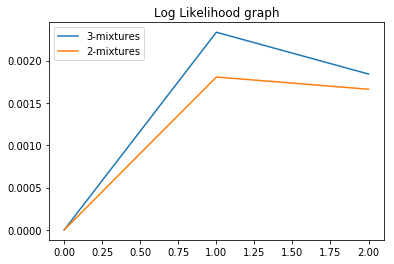

In [0]:
# 3-mixture is better log likehood more than every iteration
plt.title('Log Likelihood graph')
plt.plot(np.arange(num_iteration), three_mixture_likelihood, label='3-mixtures')
plt.plot(np.arange(num_iteration), two_mixture_likelihood, label='2-mixtures')
plt.legend()
plt.show()